In [1]:
# import the stuff needed
import mesa_reader as mr
from math import log
import matplotlib.pylab as plt
import numpy as np
from heapq import nlargest

In [13]:
# bringing in the data
import os

filenames = []

# find all the files in the directory called "history.data"
# workingDirectory = '/Users/emilyflynn/Desktop/25M_tests/15M_logs'
workingDirectory = '/Users/emilyflynn/Desktop/1.0M_Sun'

for root, dirs, files in os.walk(workingDirectory):
    for file in files:
        if file.endswith("history.data"):
            filenames.append(os.path.join(root, file))

# for each file, go in and correct that quotation mark error
# replace 10.14-2019 with 10.14-2019"
for file in filenames:
    s = open(file).read()
    s = s.replace('10.14-2019 ', '10.14-2019"')
    f = open(file, 'w')
    f.write(s)
    f.close()

# for each file, read it into a variable based on which log folder it's in
hBRExists = False
hARExists, hRExists = False, False
htSBExists, htlgTExists = False, False
hCExists, hFExists, hLExists = False, False, False

for file in filenames:
    if 'before_remove' in file:
        hBR = mr.MesaData(file)
        hBRExists = True
        
    elif 'after_remove' in file:
        hAR = mr.MesaData(file)
        hARExists = True
        
    elif 'remove' in file:
        hR = mr.MesaData(file)
        hRExists = True
        
    elif 'to_si_burn' in file:
        htSB = mr.MesaData(file)
        htSBExists = True
        
    elif 'to_lgT_9.9' in file:
        htlgT = mr.MesaData(file)
        hlgTExists = True
        
    elif 'convert' in file:
        hC = mr.MesaData(file)
        hCExists = True
        
    elif 'finish' in file:
        hF = mr.MesaData(file)
        hFExists = True
        
    else:
        hL = mr.MesaData(file)
        hLExists = True

In [14]:
# frankenstein the data together because MESA is MESA

hModels = []
hLum = []
hAge = []
hTemp = []
hRadius = []
hMass = []
hHeMass = []

if hBRExists:
    hLum.append(hBR.log_L)
    hTemp.append(hBR.log_Teff)
    hAge.append(hBR.star_age)
    hRadius.append(hBR.log_R)
    hModels.append(hBR.model_number)
    hMass.append(hBR.star_mass)
    hHeMass.append(hBR.he_core_mass)

if hRExists:
    hLum.append(hR.log_L)
    hTemp.append(hR.log_Teff)
    hAge.append(hR.star_age)
    hRadius.append(hR.log_R)
    hModels.append(hR.model_number)
    hMass.append(hR.star_mass)
    hHeMass.append(hR.he_core_mass)

if hARExists:
    hLum.append(hAR.log_L)
    hTemp.append(hAR.log_Teff)
    hAge.append(hAR.star_age)
    hRadius.append(hAR.log_R)
    hModels.append(hAR.model_number)
    hMass.append(hAR.star_mass)
    hHeMass.append(hAR.he_core_mass)

if htSBExists:
    hLum.append(htSB.log_L)
    hTemp.append(htSB.log_Teff)
    hAge.append(htSB.star_age)
    hRadius.append(htSB.log_R)
    hModels.append(htSB.model_number)
    hMass.append(htSB.star_mass)
    hHeMass.append(htSB.he_core_mass)

if htlgTExists:
    hLum.append(htlgT.log_L)
    hTemp.append(htlgT.log_Teff)
    hAge.append(htlgT.star_age)
    hRadius.append(htlgT.log_R)
    hModels.append(htlgT.model_number)
    hMass.append(htlgT.star_mass)
    hHeMass.append(htlgT.he_core_mass)

if hCExists:
    hLum.append(hC.log_L)
    hTemp.append(hC.log_Teff)
    hAge.append(hC.star_age)
    hRadius.append(hC.log_R)
    hModels.append(hC.model_number)
    hMass.append(hC.star_mass)
    hHeMass.append(hC.he_core_mass)

if hFExists:
    hLum.append(hF.log_L)
    hTemp.append(hF.log_Teff)
    hAge.append(hF.star_age)
    hRadius.append(hF.log_R)
    hModels.append(hF.model_number)
    hMass.append(hF.star_mass)
    hHeMass.append(hF.he_core_mass)

if hLExists:
    hLum.append(hL.log_L)
    hTemp.append(hL.log_Teff)
    hAge.append(hL.star_age)
    hRadius.append(hL.log_R)
    hModels.append(hL.model_number)
    hMass.append(hL.star_mass)
    hHeMass.append(hL.he_core_mass)

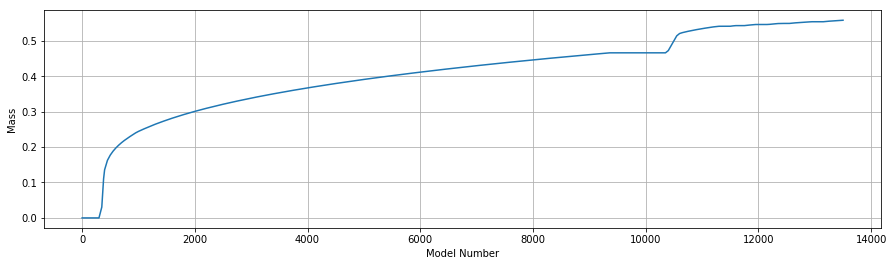

In [15]:
fig, ax = plt.subplots(figsize=(15,4))

for x in range(len(hLum)):
    plt.plot(hModels[x], hHeMass[x])

plt.xlabel('Model Number')
plt.ylabel('Mass')
plt.grid(axis='both')

plt.show()